# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


# Dataset Analysis

In [3]:
# Overall view of datafram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [4]:
# Missing Values
df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passengers,6433.0,1.539251,1.203768,0.0,1.00,1.00,2.00,6.00
distance,6433.0,3.024617,3.827867,0.0,0.98,1.64,3.21,36.70
fare,6433.0,13.091073,11.551804,1.0,6.50,9.50,15.00,150.00
tip,6433.0,1.979220,2.448560,0.0,0.00,1.70,2.80,33.20
tolls,6433.0,0.325273,1.415267,0.0,0.00,0.00,0.00,24.02
total,6433.0,18.517794,13.815570,1.3,10.80,14.16,20.30,174.82


In [6]:
# check shape of dataframe
df.shape

(6433, 14)

In [7]:
# check data types
df.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [8]:
# Check categorical feature's values
for col in df.select_dtypes('object'):
  print(f"\n{col}'s Unique Values:")
  print(df[col].value_counts())
  print("*" * 30)


color's Unique Values:
yellow    5451
green      982
Name: color, dtype: int64
******************************

payment's Unique Values:
credit card    4577
cash           1812
Name: payment, dtype: int64
******************************

pickup_zone's Unique Values:
Midtown Center                         230
Upper East Side South                  211
Penn Station/Madison Sq West           210
Clinton East                           208
Midtown East                           198
                                      ... 
Homecrest                                1
Bedford Park                             1
Riverdale/North Riverdale/Fieldston      1
Hollis                                   1
Hillcrest/Pomonok                        1
Name: pickup_zone, Length: 194, dtype: int64
******************************

dropoff_zone's Unique Values:
Upper East Side North        245
Murray Hill                  220
Midtown Center               215
Upper East Side South        177
Midtown East          

# Data Preprocessing

## Data Cleaning

In [9]:
# There not much NaNs , so i will drop them all.
df.dropna(inplace=True)

In [10]:
df.info() # check dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6341 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

## Feature Engineering

## Datetime

In [11]:
# Extract day, month and year from pickup feature
df['trip_day'] = df['pickup'].dt.day
df['trip_month'] = df['pickup'].dt.month
df['trip_year'] = df['pickup'].dt.year

## Tip Percentage Of Fare

In [12]:
df['tip_percent'] = (df['tip'] / df['fare']) * 100

# Exploratory Data Analysis

## Outliers

In [53]:
def outlier(col):
  plt.figure(figsize=(8, 4))
  plt.boxplot(col, meanline=True, data=df)
  plt.title(f"{col}'s Boxplot")
  plt.show()

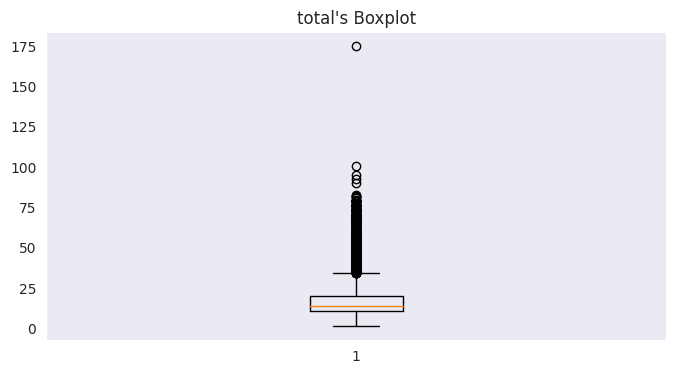

In [54]:
outlier('total')

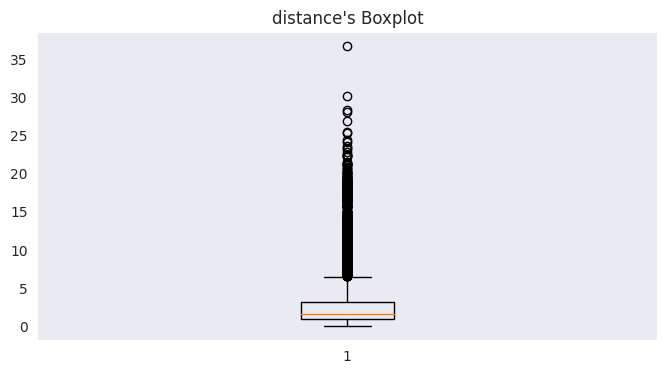

In [55]:
outlier('distance')

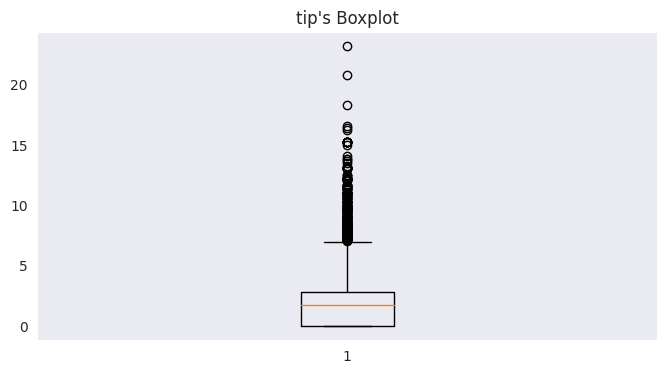

In [59]:
outlier('tip')

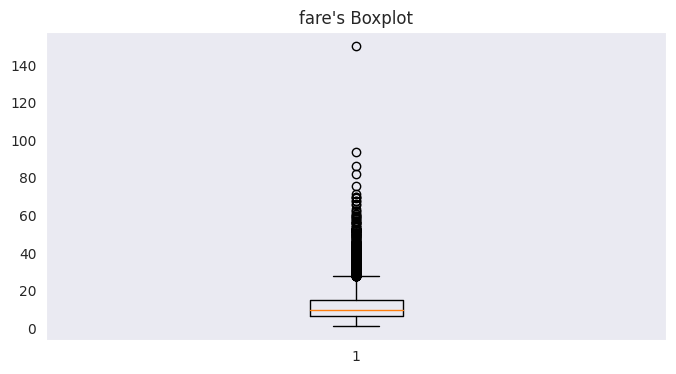

In [57]:
outlier('fare')

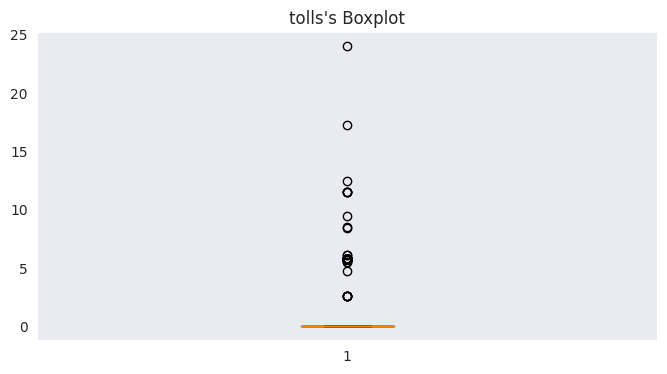

In [58]:
outlier('tolls')

## Distributions

In [13]:
def get_dist(col):
  # Get mean , median
  # Calculate mean and median
  mean_val = df[col].mean()
  median_val = df[col].median()

  # Plot Histograim
  sns.set_style('dark')
  plt.figure(figsize=(6, 6))
  sns.histplot(data=df, x=col, bins=80, kde=True, color='blue', edgecolor='black')

  # Plot mean and median as vertical lines
  plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
  plt.axvline(median_val, color='yellow', linestyle='--', label=f'Median: {median_val:.2f}')

  # Add title and x, y label
  plt.title(f"Distribution Of {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("Frequency")
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.grid(axis='y', linestyle='--', alpha=0.8)
  plt.legend(fontsize=10)
  # Show plot
  plt.show()

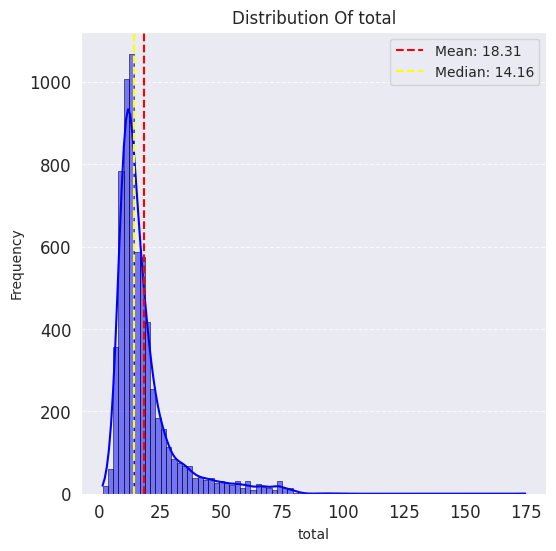

In [14]:
get_dist('total')

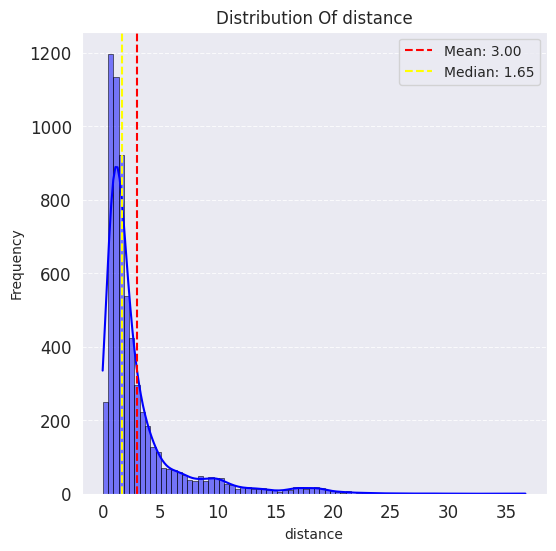

In [15]:
get_dist('distance')

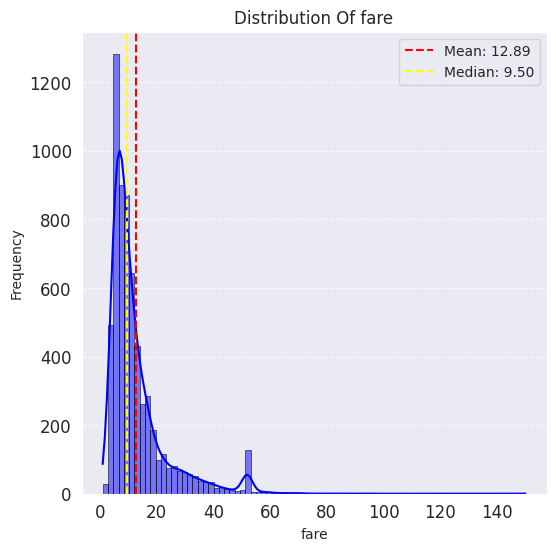

In [16]:
get_dist('fare')

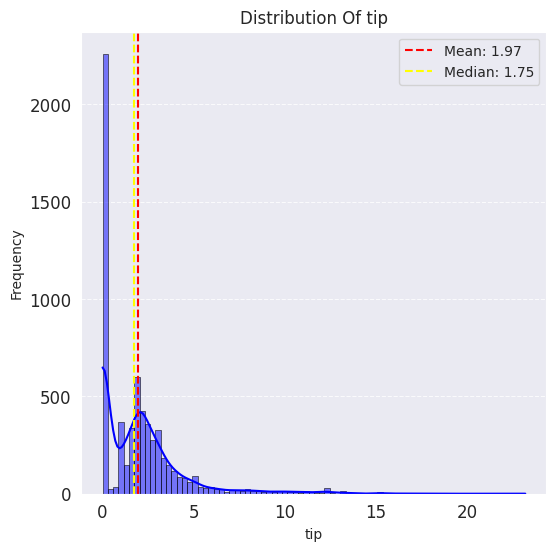

In [17]:
get_dist('tip')

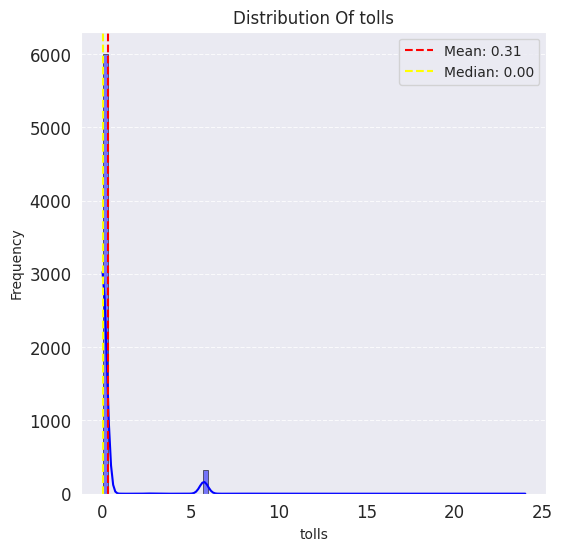

In [18]:
get_dist('tolls')

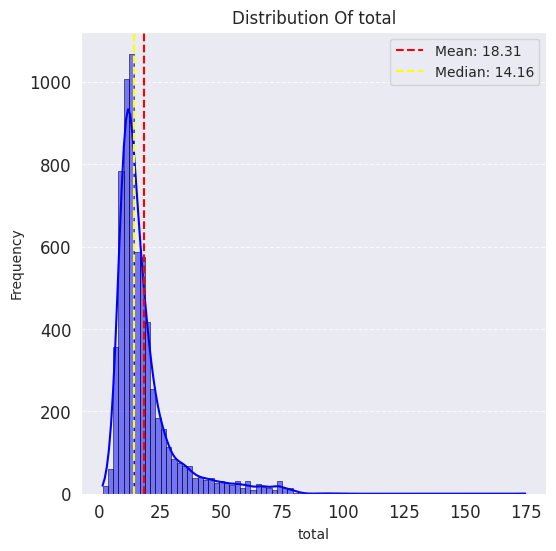

In [19]:
get_dist('total')

## Frequncy Tables

In [20]:
def frequency_table(col, sort=False, n=10):
  return df.groupby(col)[col].count().sort_values(ascending=sort).to_frame().head(n)

In [21]:
frequency_table('payment')

,payment
payment,
credit card,4546
cash,1795


In [22]:
frequency_table('color')

,color
color,
yellow,5373
green,968


In [23]:
frequency_table('pickup_zone')

,pickup_zone
pickup_zone,
Midtown Center,227
Penn Station/Madison Sq West,209
Upper East Side South,208
Clinton East,208
Midtown East,196
Upper East Side North,185
Times Sq/Theatre District,182
Union Sq,180
Lincoln Square East,176


In [24]:
frequency_table('dropoff_zone')

,dropoff_zone
dropoff_zone,
Upper East Side North,244
Murray Hill,217
Midtown Center,215
Midtown East,175
Upper East Side South,173
Times Sq/Theatre District,158
Lincoln Square East,154
Clinton East,151
East Village,150


In [25]:
frequency_table('pickup_borough')

,pickup_borough
pickup_borough,
Manhattan,5226
Queens,638
Brooklyn,378
Bronx,99


In [26]:
frequency_table('dropoff_borough', sort=False, n=3)

,dropoff_borough
dropoff_borough,
Manhattan,5172
Queens,534
Brooklyn,497


## Fare / Distance

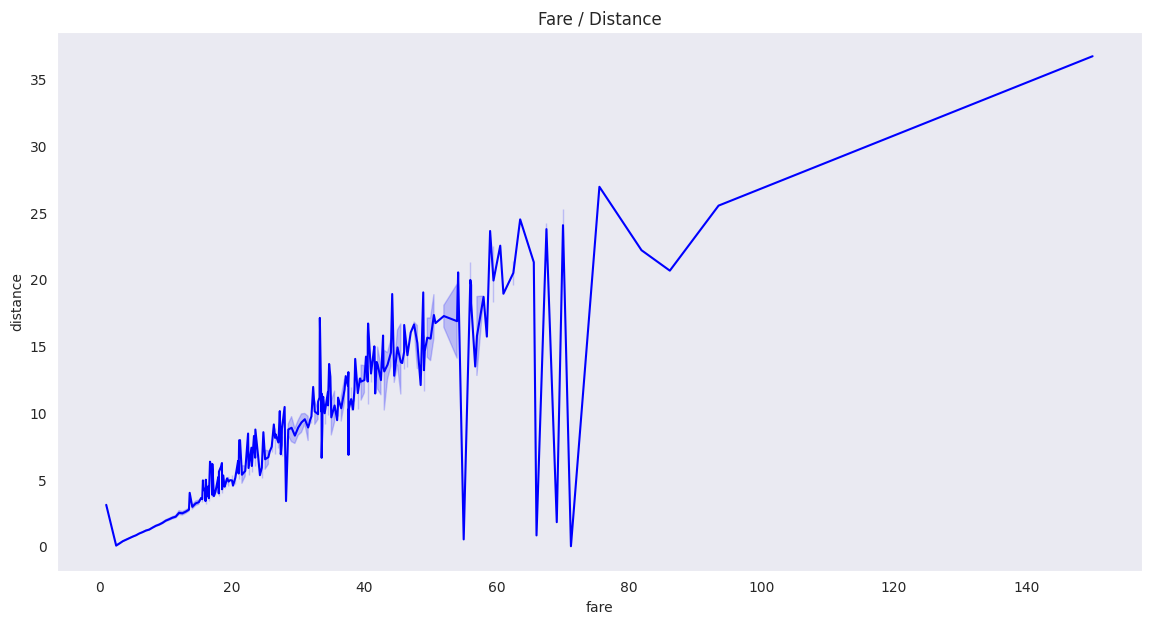

In [27]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, y='distance', x='fare', color="blue")
plt.title("Fare / Distance")
plt.show()

## Hourly Demand

In [28]:
hourly_demand = df.groupby(df['pickup'].dt.hour).size().to_frame()
hourly_demand

,0
pickup,
0,198
1,109
2,97
3,65
4,55
5,50
6,134
7,217
8,312


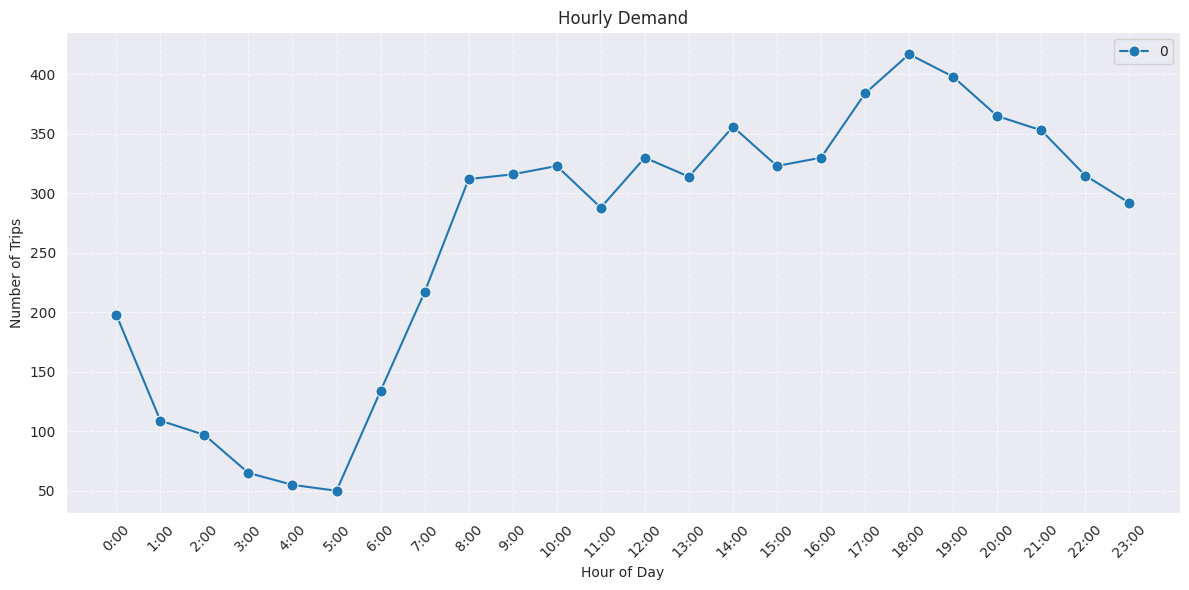

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_demand, color='blue', marker='o', markersize=8, linestyle='-')
plt.title("Hourly Demand")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24), [f'{hour}:00' for hour in range(24)], rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Daily Demands

In [30]:
daily_demands = df.groupby('trip_day').size().to_frame()
daily_demands

,0
trip_day,
1,236
2,194
3,167
4,170
5,228
6,255
7,217
8,229
9,199


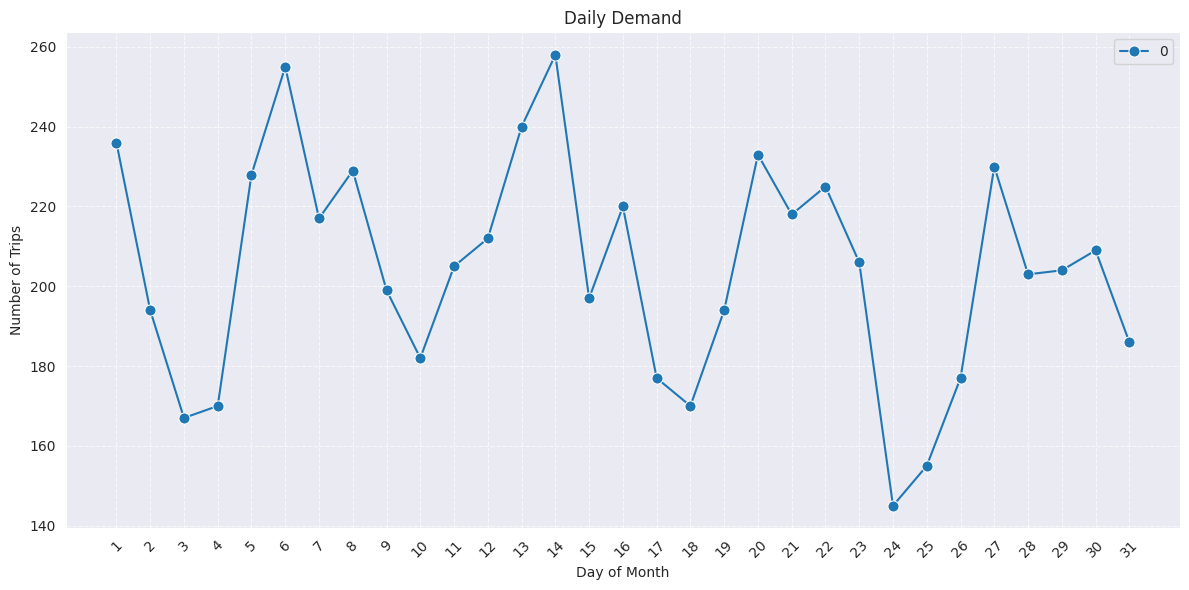

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_demands, color='blue', marker='o', markersize=8, linestyle='-')
plt.title("Daily Demand")
plt.xlabel("Day of Month")
plt.ylabel("Number of Trips")
plt.xticks(range(1, 32), [f'{day}' for day in range(1, 32)], rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [32]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,trip_day,trip_month,trip_year,tip_percent
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,23,3,2019,30.714286
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,4,3,2019,0.000000
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,27,3,2019,31.466667
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,10,3,2019,22.777778
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,30,3,2019,12.222222


## Distribution of Pickup Zone

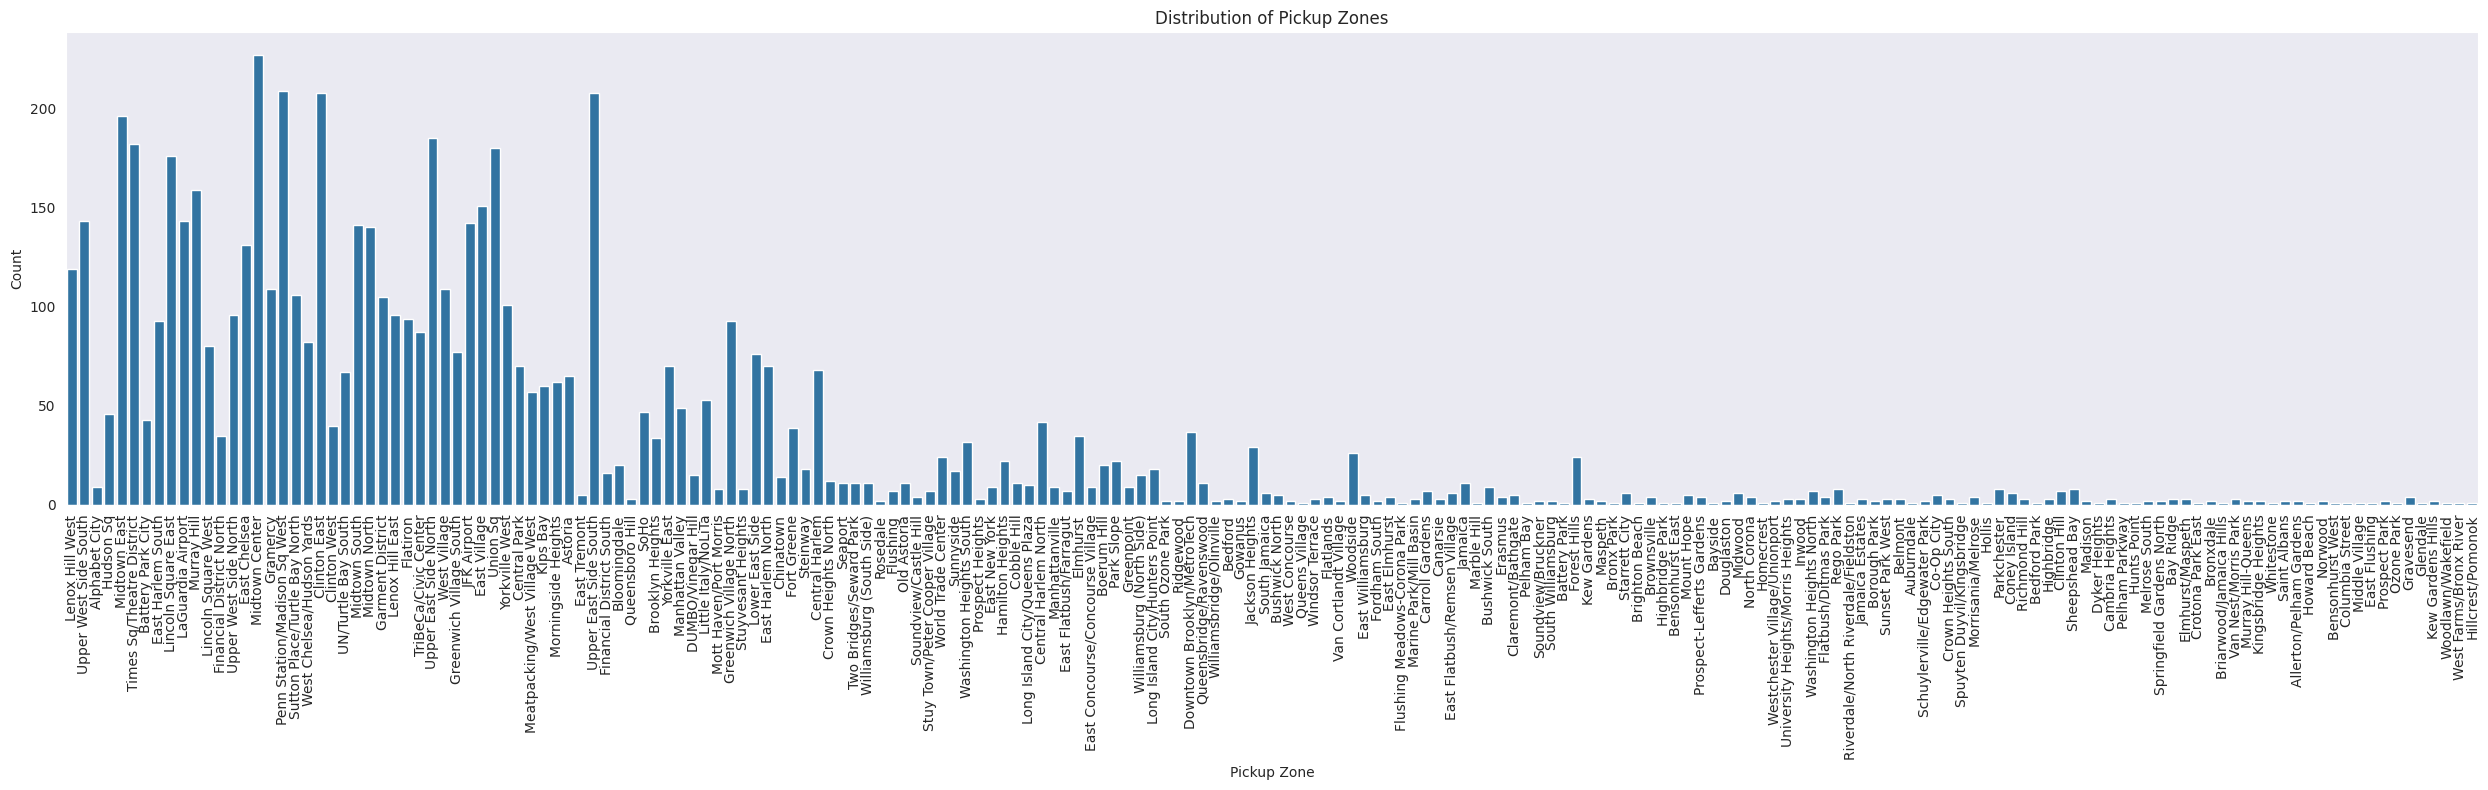

In [33]:
plt.figure(figsize=(25, 8))
sns.countplot(x='pickup_zone', data=df)
plt.title('Distribution of Pickup Zones')
plt.xlabel('Pickup Zone')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Distribution Of Dropoff Zone

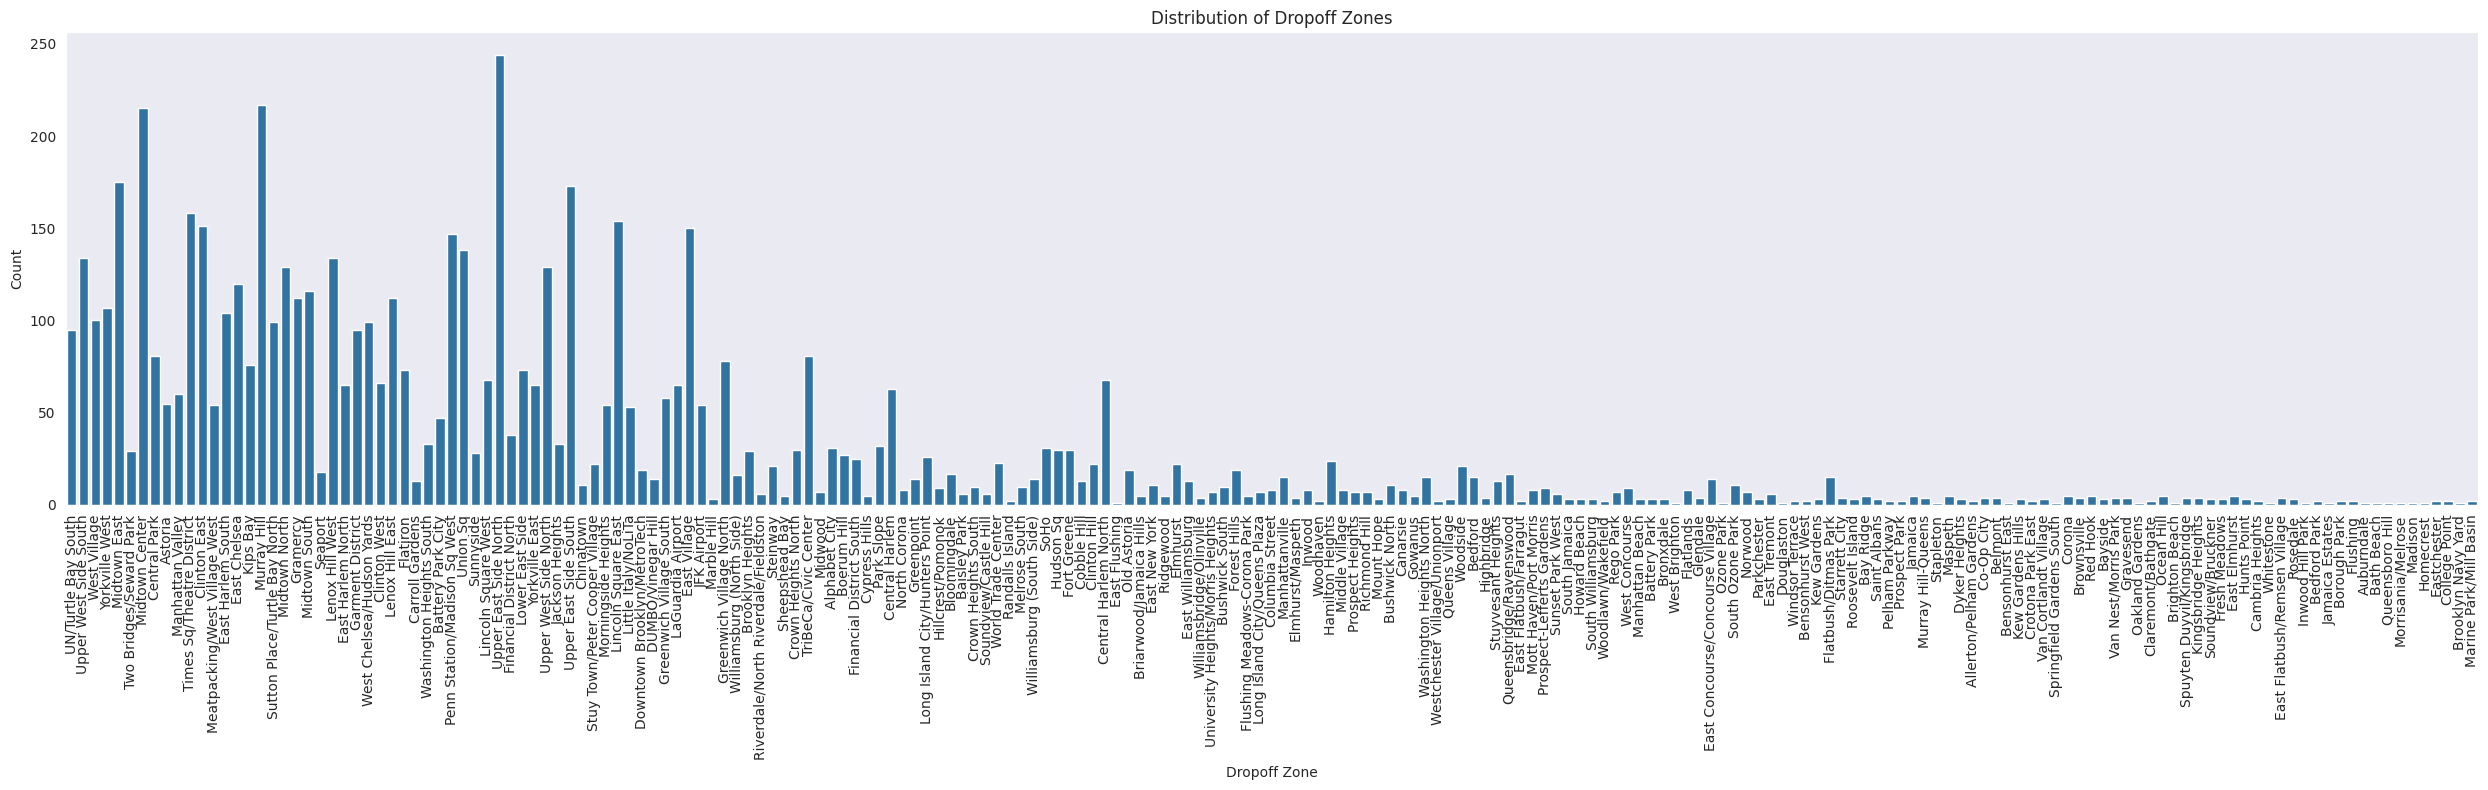

In [34]:
plt.figure(figsize=(25, 8))
sns.countplot(x='dropoff_zone', data=df)
plt.title('Distribution of Dropoff Zones')
plt.xlabel('Dropoff Zone')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Most Visited Borough

In [35]:
regions_df = df['dropoff_borough'].value_counts().sort_values(ascending=False).head(5)
regions_df

Manhattan        5172
Queens            534
Brooklyn          497
Bronx             136
Staten Island       2
Name: dropoff_borough, dtype: int64

<ipython-input-36-361107ff1bf6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regions_df.index, y=regions_df,  palette='Set1')


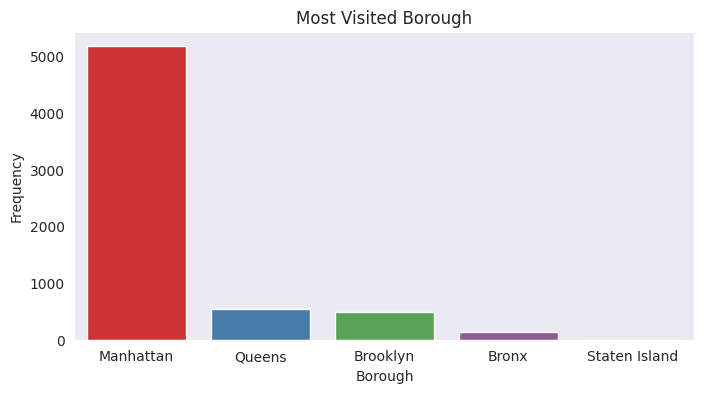

In [36]:
plt.figure(figsize=(8, 4))
sns.barplot(x=regions_df.index, y=regions_df,  palette='Set1')
plt.title("Most Visited Borough")
plt.xlabel("Borough")
plt.ylabel("Frequency")
plt.show()

## Taxi's Color

<ipython-input-37-abc0df107845>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['color'].value_counts().index, y=df['color'].value_counts(), palette='Set1')


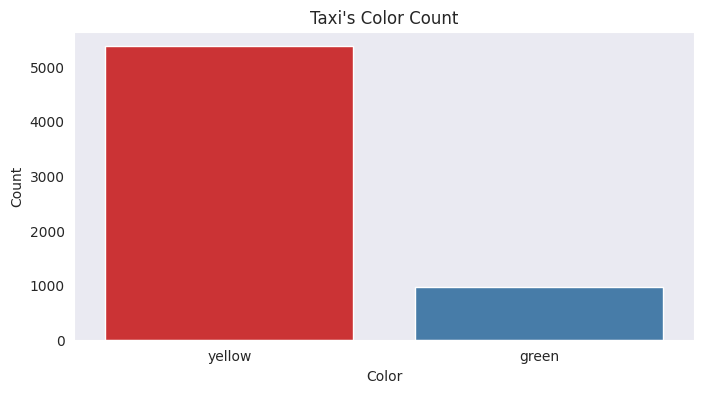

In [37]:
plt.figure(figsize=(8, 4))
sns.barplot(x=df['color'].value_counts().index, y=df['color'].value_counts(), palette='Set1')
plt.title("Taxi's Color Count")
plt.xlabel("Color")
plt.ylabel("Count")
plt.show()

## Pickup Zone Barplot

In [38]:
pickup_df = df['pickup_zone'].value_counts().sort_values(ascending=False).head(10)
pickup_df

Midtown Center                  227
Penn Station/Madison Sq West    209
Upper East Side South           208
Clinton East                    208
Midtown East                    196
Upper East Side North           185
Times Sq/Theatre District       182
Union Sq                        180
Lincoln Square East             176
Murray Hill                     159
Name: pickup_zone, dtype: int64

<ipython-input-39-b9bfb0be86de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pickup_df.index, y=pickup_df, palette='Set1')


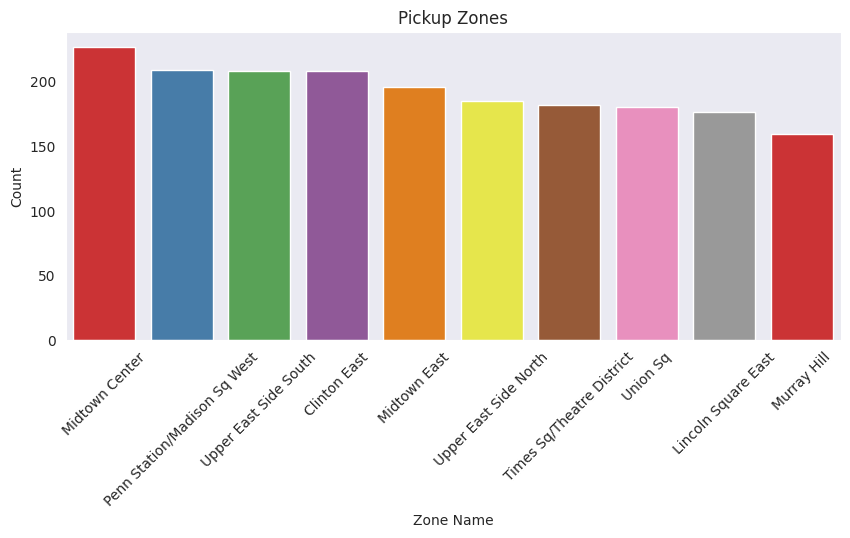

In [39]:
plt.figure(figsize=(10, 4))
sns.barplot(x=pickup_df.index, y=pickup_df, palette='Set1')
plt.title("Pickup Zones")
plt.xlabel("Zone Name")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Dropoff Zone's Barplot

In [40]:
dropoff_df = df['dropoff_zone'].value_counts().sort_values(ascending=False).head(10)
dropoff_df

Upper East Side North           244
Murray Hill                     217
Midtown Center                  215
Midtown East                    175
Upper East Side South           173
Times Sq/Theatre District       158
Lincoln Square East             154
Clinton East                    151
East Village                    150
Penn Station/Madison Sq West    147
Name: dropoff_zone, dtype: int64

<ipython-input-41-72b81079306e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dropoff_df.index, y=dropoff_df,palette='Set1')


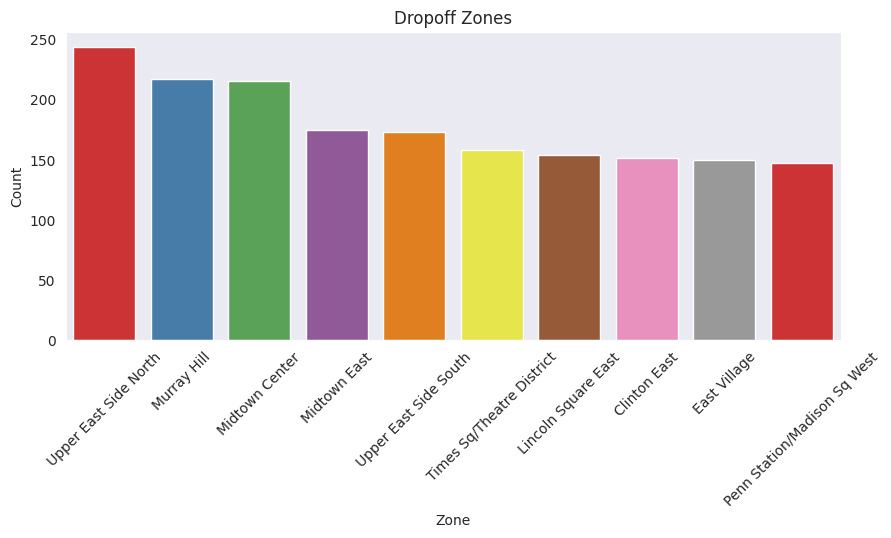

In [41]:
plt.figure(figsize=(10, 4))
sns.barplot(x=dropoff_df.index, y=dropoff_df,palette='Set1')
plt.title("Dropoff Zones")
plt.xlabel("Zone")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Top 10 Average Distance By Dropoff and Pickup Zones

In [42]:
pickup_dropoff_df = df.groupby(['pickup_zone', 'dropoff_zone'])[[ 'distance']].mean()
pickup_dropoff_df = pickup_dropoff_df.nlargest(10, 'distance')
pickup_dropoff_df

,,distance
pickup_zone,dropoff_zone,
JFK Airport,Meatpacking/West Village West,30.230
World Trade Center,JFK Airport,28.300
Financial District North,JFK Airport,28.150
Sunset Park West,Saint Albans,25.510
East Harlem North,Brooklyn Heights,25.280
Starrett City,Washington Heights North,24.480
JFK Airport,Riverdale/North Riverdale/Fieldston,24.200
Kingsbridge Heights,Kingsbridge Heights,23.610
JFK Airport,Mount Hope,23.300


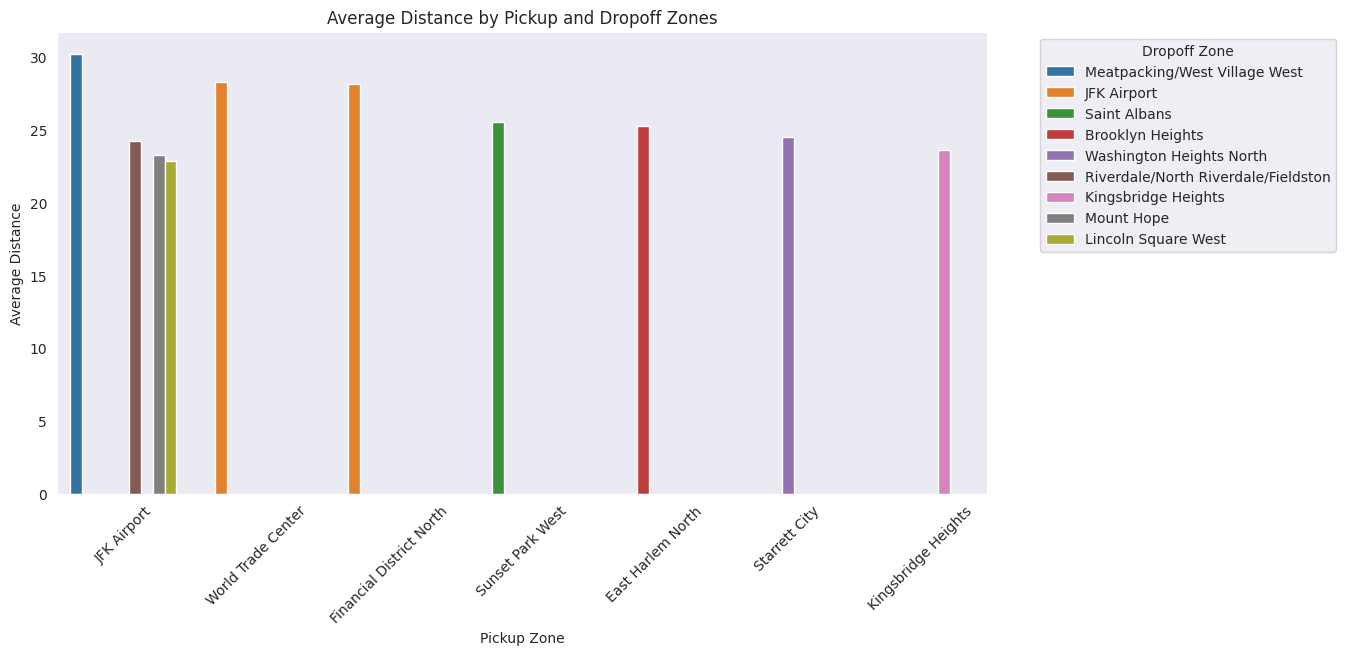

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_zone', y='distance', hue='dropoff_zone', data=pickup_dropoff_df)
plt.title('Average Distance by Pickup and Dropoff Zones')
plt.xlabel('Pickup Zone')
plt.ylabel('Average Distance')
plt.xticks(rotation=45)
plt.legend(title='Dropoff Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Top 10 Average Cost by Pickup and Dropoff Zone

In [44]:
cost_pickup_dropoff_df = df.groupby(['pickup_zone', 'dropoff_zone'])[['total']].mean()
cost_pickup_dropoff_df = cost_pickup_dropoff_df.nlargest(10, 'total')
cost_pickup_dropoff_df

total
pickup_zone                       dropoff_zone                         
Sunset Park West                  Saint Albans                   94.800
Coney Island                      Upper East Side North          92.400
University Heights/Morris Heights Yorkville East                 82.360
TriBeCa/Civic Center              West Brighton                  81.350
JFK Airport                       Cobble Hill                    79.145
                                  Meatpacking/West Village West  78.670
South Jamaica                     Flushing Meadows-Corona Park   78.670
Clinton West                      JFK Airport                    78.660
JFK Airport                       Lenox Hill West                78.660
Cambria Heights                   Morningside Heights            77.610

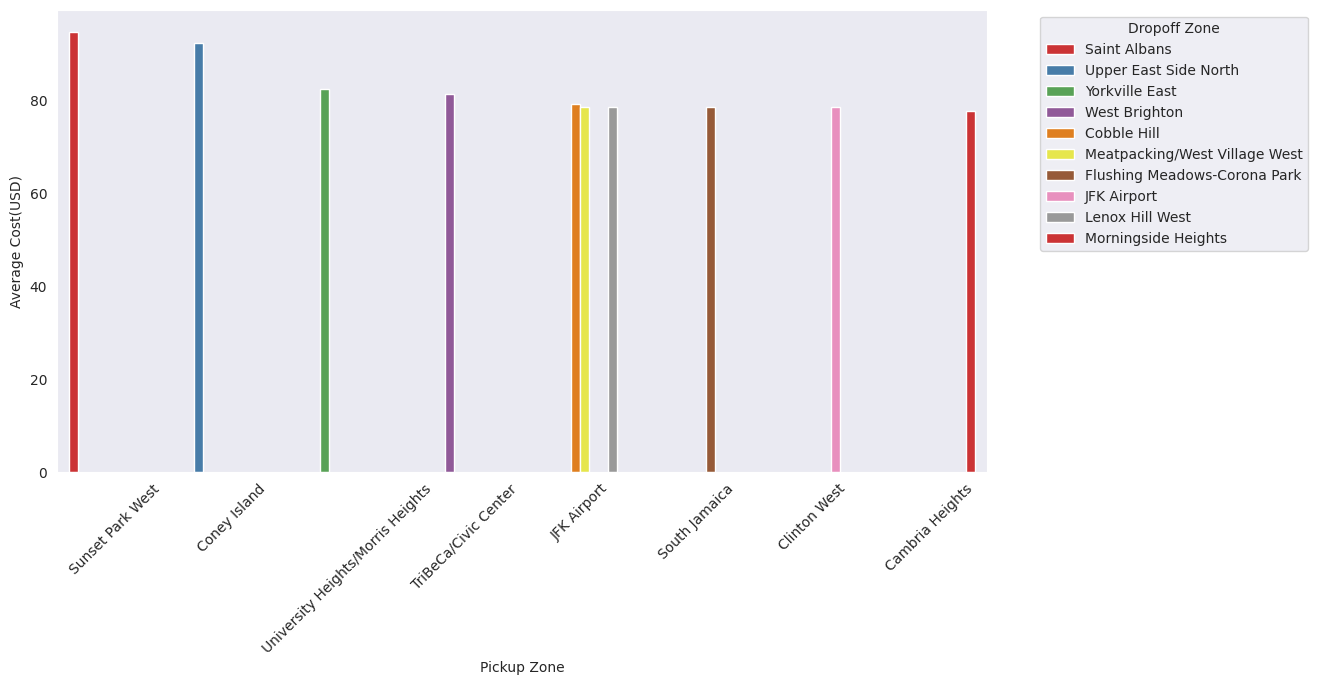

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_zone', y='total', hue='dropoff_zone', data=cost_pickup_dropoff_df, palette='Set1')
plt.xlabel('Pickup Zone')
plt.ylabel('Average Cost(USD)')
plt.xticks(rotation=45)
plt.legend(title='Dropoff Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Correlation Heatmap

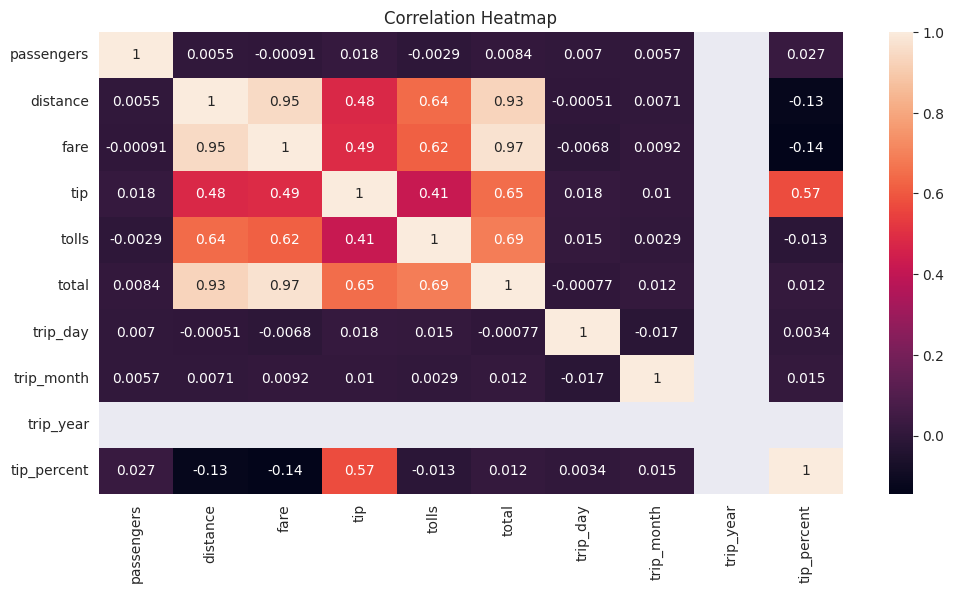

In [63]:
# Correlation
df_corr = df.corr(numeric_only=True)
# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(data=df_corr, annot=True, fmt='.2g')
plt.title("Correlation Heatmap")
plt.xticks(rotation=90)
plt.show()

## Regression Plot

In [68]:
def plot_regplot(x, y, data=df, title=None, xlabel=None, ylabel=None):

    plt.figure(figsize=(10, 6))
    sns.regplot(x=x, y=y, data=data)
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

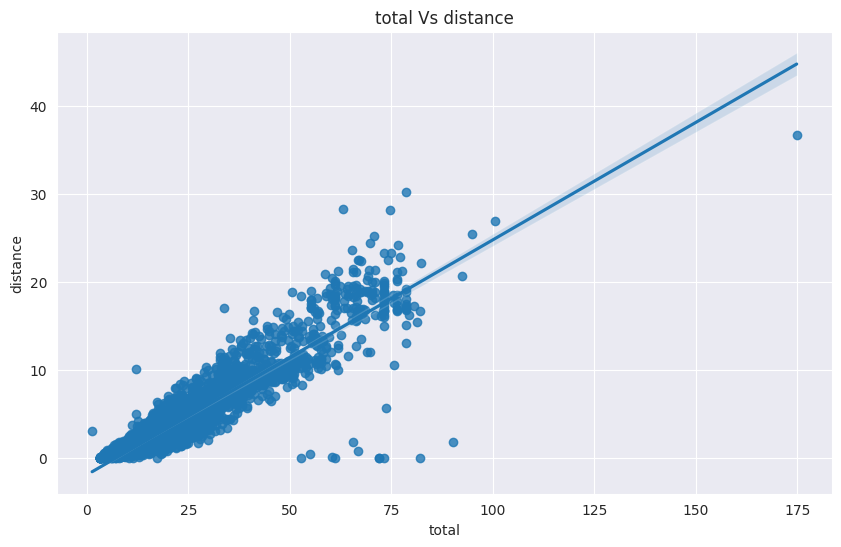

In [67]:
plot_regplot('total', 'distance', data=df, title="total Vs distance", xlabel='total', ylabel='distance')

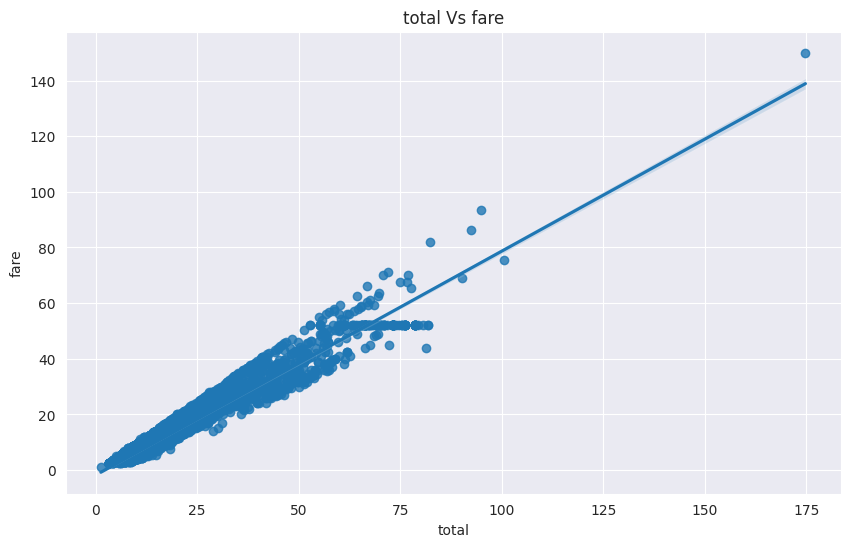

In [69]:
plot_regplot('total', 'fare', data=df, title="total Vs fare", xlabel='total', ylabel='fare')

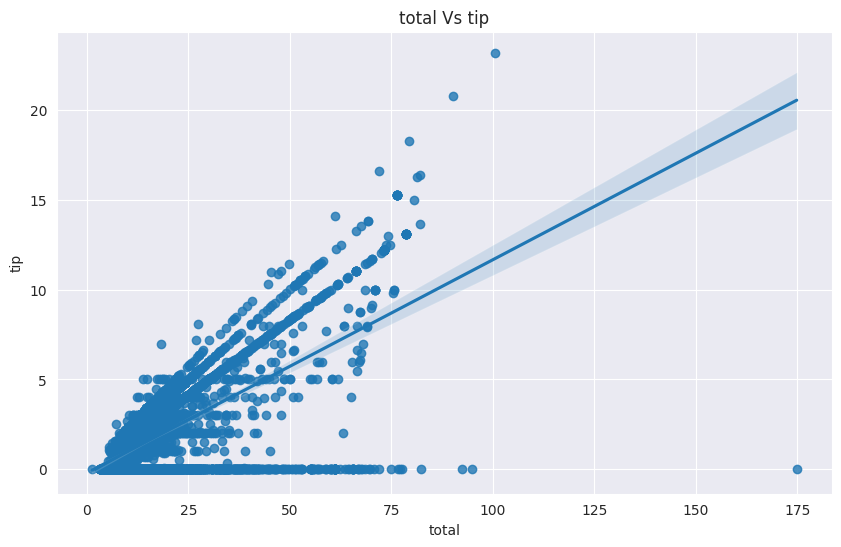

In [70]:
plot_regplot('total', 'tip', data=df, title="total Vs tip", xlabel='total', ylabel='tip')

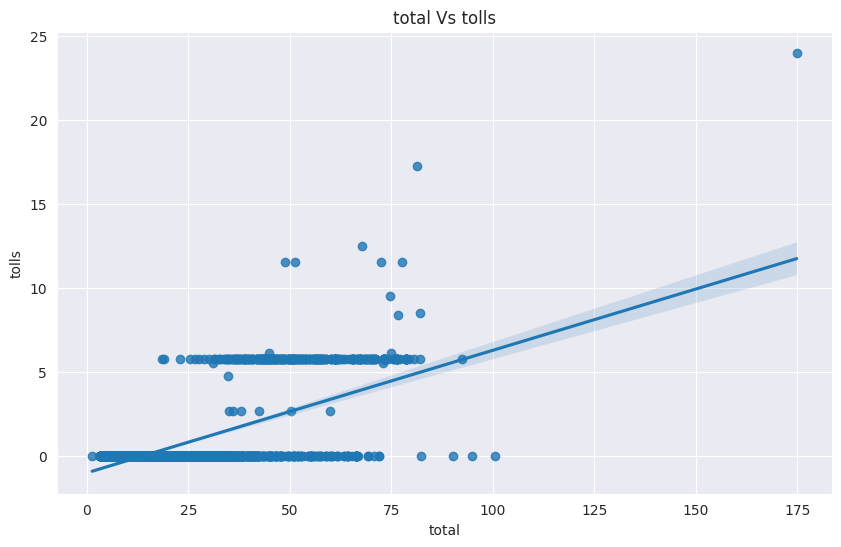

In [71]:
plot_regplot('total', 'tolls', data=df, title="total Vs tolls", xlabel='total', ylabel='tolls')